In [57]:
# Imports
import json
from pprint import pprint
import glob
import re
import pandas as pd
import seaborn as sns
from scipy import stats
from math import sqrt
from scipy.stats import t
%matplotlib inline

In [58]:
pd.options.display.float_format = '{:,.4f}'.format

In [59]:
class ExperimentResults:

    def __init__(self, expId, parameters, results):
        self.expId = expId
        self.parameters = parameters
        for v in results:
            v.update(parameters)
        
        self.results = pd.DataFrame(results)


def getAllExperiments():
    experiments = {}
    for file in glob.glob("experiment-*.json"):

        fileName = file.split("/")[-1]
        experimentNr = re.match("experiment-([\d]+).json", fileName).group(1)
        with open(file) as f:
            e = json.load(f)

            experiments[int(experimentNr)] = ExperimentResults(e["experiment"], e["parameters"], e["results"])

    return experiments

def getExperimentResultsForIds(exps, ids):
    retVal = []
    for i in ids:
        retVal.append(exps[i].results)
    return pd.concat(retVal)


In [60]:
experiments = getAllExperiments()

In [61]:
firstExps = getExperimentResultsForIds(experiments, [1,2,3,4])

In [62]:
def drawBoxPlotForExperiments(expList, x,y):
    ax = sns.boxplot(x=x, y=y, data=expList)

# Plot for question 1

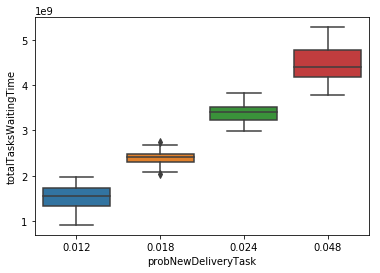

In [63]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTasksWaitingTime")

# Plots for question 2

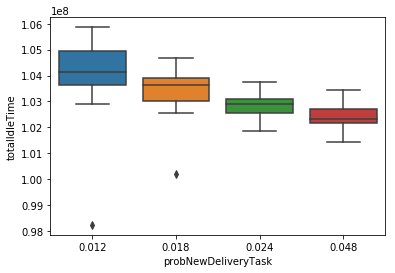

In [64]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalIdleTime")

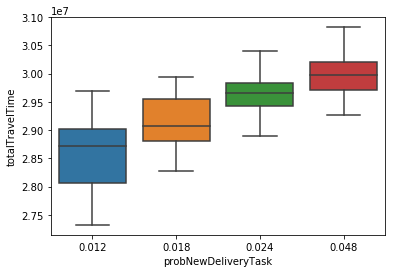

In [65]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTravelTime")

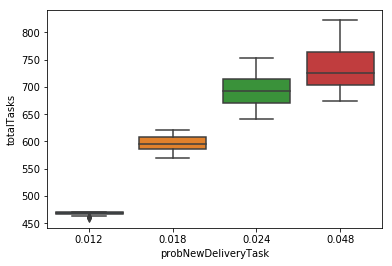

In [66]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTasks")

# Question 3

In [68]:
secondExps = getExperimentResultsForIds(experiments, [5,6,7,8])

KeyError: 5

# Plots for question 3

In [67]:
drawBoxPlotForExperiments(secondExps, "numRobots", "totalTasksWaitingTime")

NameError: name 'secondExps' is not defined

# t-tests

In [95]:
def performT(first, second, keyValue):
    n1 = first.shape[0]
    n2 = second.shape[0]
    
    # calculate degrees of freedom
    df = n1 + n2 - 2
    
    equalVar = stats.levene(first[keyValue],second[keyValue])[1] > 0.05
    
    ind_t_test = stats.ttest_ind(first[keyValue], second[keyValue], equal_var=equalVar)

    std1 = first[keyValue].std()
    std2 = second[keyValue].std()

    std_n1n2 = sqrt( ((n1 - 1)*(std1)**2 + (n2 - 1)*(std2)**2) / df) 
    
    diff_mean = first[keyValue].mean() - second[keyValue].mean()
    MoE = t.ppf(0.975, df) * std_n1n2 * sqrt(1/n1 + 1/n2)
    print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
    print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))
    

In [97]:
performT(experiments[1].results, experiments[2].results, "totalIdleTime")

The results of the independent t-test are: 
	t-value = 3.780
	p-value = 0.000

The difference between groups is 740820.0 [351930.3 to 1129709.7] (mean [95% CI])


274882788.54291207